In [42]:
from doc_tool import DocTool
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [43]:
dt = DocTool()
docContent = dt.readFile("dataset/englishText1.txt")

DocInitialized2


In [44]:
pureSentences = dt.getPureSentences(docContent)

In [45]:
print("Sentences:",pureSentences)

Sentences: ['in recent years text mining has become one of the most popular research areas in data mining due to the rapid growth and evolution of digital text documents such as web pages office documents and emails', 'as the demand to organize these documents automatically is constantly rising text classification or text categorization become one active subfields for data mining researchers', 'text classification deals with the problem of automatically assigning single or multiple category or class labels to a new text document based after learning from a set of training documents with correct category labels', 'most existing text classification methods and text mining methods at large adopt the approach of transforming the text mining problem into traditional machine learning problem where a large number of mature techniques can be applied 7 14 17 18 8', 'usually the conversion of a text document into a rela tional tuple is performed using the popular vectorspace model model', 'intui

In [46]:
words = dt.sentences2Words(pureSentences)

In [47]:
print("Words:",words)

Words: ['in', 'recent', 'years', 'text', 'mining', 'has', 'become', 'one', 'of', 'the', 'most', 'popular', 'research', 'areas', 'in', 'data', 'mining', 'due', 'to', 'the', 'rapid', 'growth', 'and', 'evolution', 'of', 'digital', 'text', 'documents', 'such', 'as', 'web', 'pages', 'office', 'documents', 'and', 'emails', 'as', 'the', 'demand', 'to', 'organize', 'these', 'documents', 'automatically', 'is', 'constantly', 'rising', 'text', 'classification', 'or', 'text', 'categorization', 'become', 'one', 'active', 'subfields', 'for', 'data', 'mining', 'researchers', 'text', 'classification', 'deals', 'with', 'the', 'problem', 'of', 'automatically', 'assigning', 'single', 'or', 'multiple', 'category', 'or', 'class', 'labels', 'to', 'a', 'new', 'text', 'document', 'based', 'after', 'learning', 'from', 'a', 'set', 'of', 'training', 'documents', 'with', 'correct', 'category', 'labels', 'most', 'existing', 'text', 'classification', 'methods', 'and', 'text', 'mining', 'methods', 'at', 'large', 'ad

In [48]:
textGraph = nx.Graph()

In [49]:
# trace all text and extract simple graph. Each node/word connected with it's prev. word
textGraph.add_node(words[0])
for i in range(1,len(words)):
    textGraph.add_node(words[i])
    textGraph.add_edge(words[i-1],words[i],weight=1)

In [54]:
print("Nodes[",textGraph.number_of_nodes(),"]:",textGraph.nodes())

Nodes[ 226 ]: ['recent', 'training', 'classify', 'however', 'areas', 'constantly', 'cleaned', 'approach', 'serve', 'single', 'all', 'popular', 'and', 'works', 'from', 'new', '3', 'organized', 'constructed', 'represented', 'learning', 'tional', 'matrix', 'active', 'assigning', 'vector', '18', 'problem', 'subfields', '5', 'term', 'introduces', 'relational', 'evolution', 'illustrate', 'they', 'that', 'novel', 'set', 'capturing', 'organize', 'we', 'years', 'frequently', 'termbyfrequency', '6', 'be', 'paper', '2', 'then', 'section', 'rest', 'rich', 'this', 'for', 'existing', 'collection', 'sented', 'large', 'these', 'growth', 'two', 'where', 'strengths', 'data', 'on', 'deals', 'category', 'office', 'allow', 'capable', 'fundamental', 'features', 'graph', 'tuple', 'together', 'due', 'algorithm', 'semantics', 'follows', 'document', 'than', 'one', 'order', 'promising', 'table', 'described', 'rising', 'among', 'usually', 'weights', 'intuitively', 'traditional', 'applied', 'stemmed', 'rela', 'tec

In [55]:
print("Edges[",textGraph.number_of_edges(),"]:",textGraph.edges())

Edges[ 417 ]: [('recent', 'studies'), ('recent', 'in'), ('recent', 'terms'), ('recent', 'years'), ('training', 'of'), ('training', 'documents'), ('classify', 'text'), ('classify', 'to'), ('however', '9'), ('however', 'table'), ('however', 'the'), ('areas', 'in'), ('areas', 'research'), ('constantly', 'is'), ('constantly', 'rising'), ('cleaned', 'parsed'), ('cleaned', 'and'), ('approach', 'the'), ('approach', 'of'), ('approach', 'proposed'), ('serve', 'as'), ('serve', 'and'), ('single', 'or'), ('single', 'assigning'), ('all', 'of'), ('all', 'pairs'), ('all', 'these'), ('all', 'capture'), ('popular', 'most'), ('popular', 'the'), ('popular', 'research'), ('popular', 'vectorspace'), ('and', 'uses'), ('and', 'then'), ('and', 'stemmed'), ('and', 'terms'), ('and', 'evolution'), ('and', 'text'), ('and', 'emails'), ('and', 'model'), ('and', 'growth'), ('and', 'documents'), ('and', 'methods'), ('and', 'frequently'), ('works', 'in'), ('works', 'related'), ('from', 'learning'), ('from', 'a'), ('ne

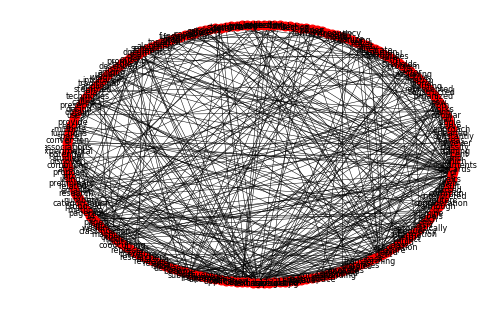

In [76]:
nx.draw_circular(textGraph,width=0.5,node_size=80,font_size=8,with_labels=True)

In [77]:
plt.savefig("outputs/textGraph.pdf") # save graph to pdf file

In [78]:
graphN2V = Node2Vec(textGraph, dimensions=64, walk_length=30, num_walks=200, workers=4) 

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:32<00:00,  1.68it/s]


In [79]:
model = graphN2V.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [80]:
testWord = "document"
similarities = model.wv.most_similar(testWord)  # Output node names are always strings

#save and print results
with open("outputs/similarity.txt","w") as f:
    f.write("Word:"+testWord+"\n")
    f.write(str(similarities))

print("Similarities of",testWord)
print(similarities)
    

Similarities of document
[('combining', 0.5127426385879517), ('after', 0.43474751710891724), ('consideration', 0.42605060338974), ('on', 0.4057071805000305), ('therefore', 0.3812699317932129), ('sented', 0.3795315623283386), ('a', 0.37520700693130493), ('although', 0.3734792470932007), ('traditional', 0.34467726945877075), ('based', 0.34033647179603577)]


In [81]:
model.wv.save_word2vec_format("outputs/node2vec_output.txt")